In [3]:
!git clone https://github.com/afrenkai/DS-3010-Final.git

fatal: destination path 'DS-3010-Final' already exists and is not an empty directory.


In [4]:
%cd DS-3010-Final

/content/DS-3010-Final


In [5]:
!ls

cv.py  DS-3010-Final  Main.ipynb		    README.md
Data   LICENSE	      new_3010_proj_work_ben.ipynb  requirements.txt


In [6]:
!pip install -r requirements.txt

In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [8]:
train_df = pd.read_csv('Data/SGEMM_train.csv')
val_df = pd.read_csv('Data/SGEMM_val.csv')
test_df = pd.read_csv('Data/SGEMM_test.csv')

# preprocessing

In [9]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
train_df['DELTA_RUNTIME'] = train_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in train_df.columns:
  if col in cols_to_combine:
    train_df = train_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
train_df = train_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
train_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,1.0,0.333333,0.333333,0.000000,0.000000,0.0,0.428571,1.000000,0.0,1.0,1.0,0.0,0.063468
1,0.142857,0.428571,1.0,0.333333,0.000000,0.000000,1.000000,1.0,0.142857,0.000000,0.0,0.0,0.0,1.0,0.009694
2,0.428571,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,1.0,1.0,1.0,1.0,0.007385
3,0.428571,1.000000,1.0,0.333333,1.000000,0.333333,0.333333,0.0,0.428571,0.000000,0.0,0.0,1.0,1.0,0.008364
4,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.142857,0.000000,0.0,0.0,1.0,1.0,0.029420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193275,1.000000,0.000000,1.0,0.333333,0.333333,1.000000,0.333333,0.0,0.428571,0.000000,1.0,1.0,1.0,1.0,0.014285
193276,0.428571,1.000000,0.0,0.333333,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.029181
193277,1.000000,0.428571,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,0.142857,0.0,0.0,1.0,1.0,0.047757
193278,0.428571,0.142857,1.0,0.333333,0.333333,1.000000,0.000000,1.0,0.142857,0.142857,0.0,1.0,1.0,0.0,0.006092


In [10]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
val_df['DELTA_RUNTIME'] = val_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in val_df.columns:
  if col in cols_to_combine:
    val_df = val_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
val_df = val_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
val_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.333333,1.0,0.142857,1.000000,0.0,0.0,0.0,1.0,0.338920
1,0.428571,0.428571,1.0,0.000000,0.333333,0.000000,0.000000,1.0,0.142857,0.000000,1.0,1.0,1.0,1.0,0.007873
2,0.428571,1.000000,0.0,0.000000,0.333333,0.333333,0.333333,1.0,0.142857,0.142857,1.0,0.0,0.0,1.0,0.050720
3,1.000000,1.000000,1.0,0.000000,0.333333,0.333333,0.333333,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.358003
4,0.142857,1.000000,1.0,0.000000,0.333333,0.000000,1.000000,0.0,0.000000,0.428571,0.0,0.0,0.0,0.0,0.006768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24155,0.428571,0.428571,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.142857,0.0,0.0,1.0,1.0,0.038341
24156,1.000000,1.000000,1.0,0.000000,0.333333,1.000000,0.333333,1.0,0.142857,0.000000,1.0,0.0,1.0,1.0,0.360161
24157,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.0,0.142857,0.428571,1.0,0.0,0.0,1.0,0.015344
24158,1.000000,0.142857,0.0,0.000000,0.000000,0.333333,1.000000,1.0,1.000000,0.000000,1.0,1.0,0.0,1.0,0.061007


In [11]:
cols_to_combine = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']
test_df['DELTA_RUNTIME'] = test_df.apply(
    lambda row: np.mean([row['Run1 (ms)'], row['Run2 (ms)'], row['Run3 (ms)'], row['Run4 (ms)']]),
    axis=1
)
for col in test_df.columns:
  if col in cols_to_combine:
    test_df = test_df.drop(col, axis = 1)
def norm(x, xmin, xmax, a, b):
  '''
  Restricts x values to range of [xmin, xmax]
  '''
  numerator = x - xmin
  denominator = xmax - xmin
  return (numerator / denominator) * (b - a) + a
min = 0
max = 1
test_df = test_df.apply(
lambda row: (norm(row, row.min(), row.max(), min, max)))
test_df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,DELTA_RUNTIME
0,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,1.0,1.0,1.0,0.0,0.256240
1,1.000000,0.428571,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.428571,0.142857,1.0,0.0,0.0,0.0,0.147520
2,0.428571,0.428571,1.0,0.000000,0.000000,0.000000,0.333333,1.0,1.000000,0.000000,1.0,1.0,0.0,1.0,0.044919
3,0.428571,1.000000,0.0,0.333333,0.000000,0.333333,0.333333,1.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.052398
4,0.428571,0.000000,1.0,1.000000,0.333333,1.000000,0.333333,0.0,0.142857,0.000000,1.0,0.0,0.0,1.0,0.037428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24155,0.428571,1.000000,1.0,0.000000,1.000000,1.000000,0.333333,0.0,0.000000,0.142857,1.0,0.0,1.0,0.0,0.004465
24156,1.000000,1.000000,1.0,0.000000,1.000000,0.333333,0.333333,1.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.050401
24157,1.000000,0.142857,0.0,0.333333,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.016093
24158,0.428571,1.000000,1.0,1.000000,0.000000,0.333333,0.000000,1.0,0.142857,1.000000,1.0,1.0,0.0,0.0,0.007261


In [12]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Want to predict Delta_Runtime via random forest
X = train_df.drop('DELTA_RUNTIME', axis=1)
y = train_df['DELTA_RUNTIME']
#Create Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#Fit Random Forest
rf.fit(X, y)
#See validation error based on validation set
y_pred = rf.predict(val_df.drop('DELTA_RUNTIME', axis=1))
mse = mean_squared_error(val_df['DELTA_RUNTIME'], y_pred)
print(f'Validation MSE: {mse}')
#Use CV to find best random forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [10]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')



Validation MSE: 1.3939262824569865e-06
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: -5.806933648262108e-06


In [13]:
best_rf = grid_search.best_estimator_

y_val_pred = best_rf.predict(val_df.drop('DELTA_RUNTIME', axis=1))
val_mse = mean_squared_error(val_df['DELTA_RUNTIME'], y_val_pred)

print(f'Validation MSE of best model: {val_mse}')

Validation MSE of best model: 3.1767434147465784e-06


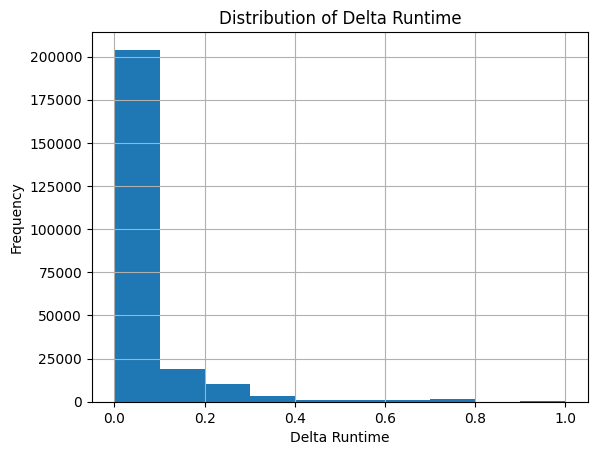

,DELTA_RUNTIME
count,241600.000000
mean,0.061341
std,0.110879
min,0.000000
25%,0.008151
50%,0.016910
75%,0.064588
max,1.000000


In [14]:
#Combine delta_runtime across test set, validation set, and training set
combined_df = pd.concat([train_df, val_df, test_df])
#Show distribution of delta_runtime with histogram with labels
import matplotlib.pyplot as plt
combined_df['DELTA_RUNTIME'].hist()
plt.xlabel('Delta Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Delta Runtime')
plt.show()
#Show summary statistics of delta_runtime
combined_df['DELTA_RUNTIME'].describe()



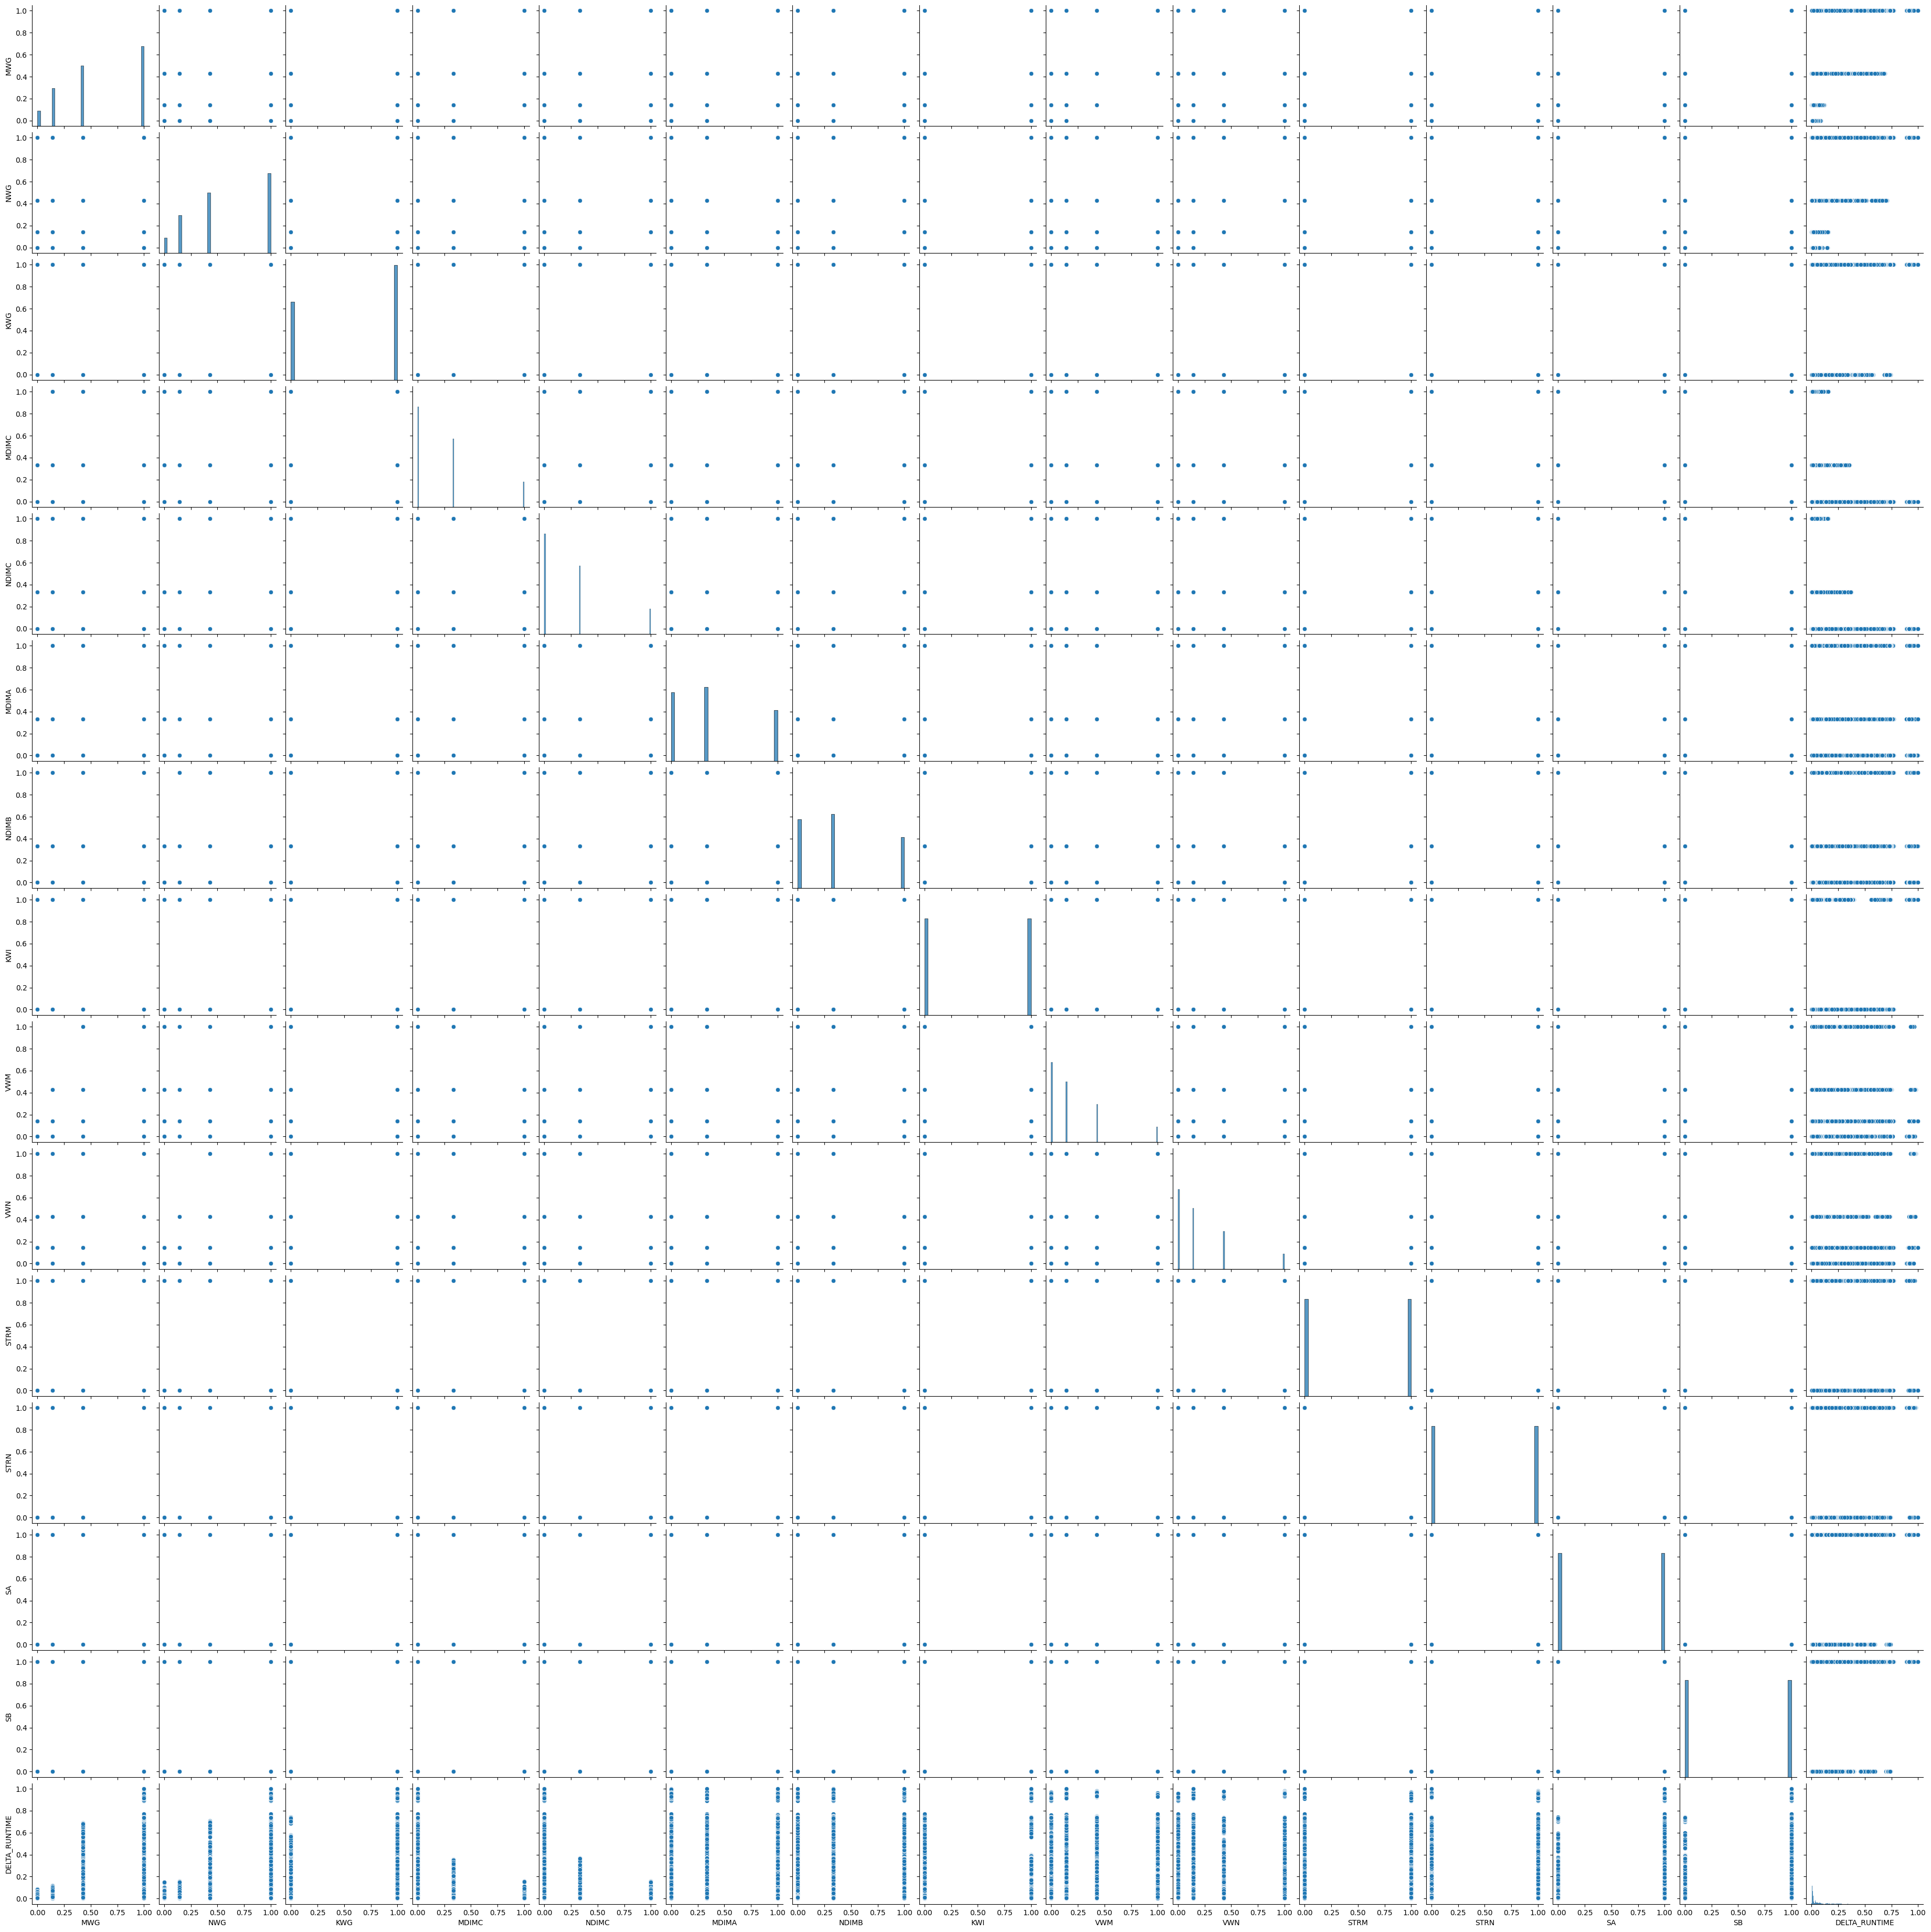

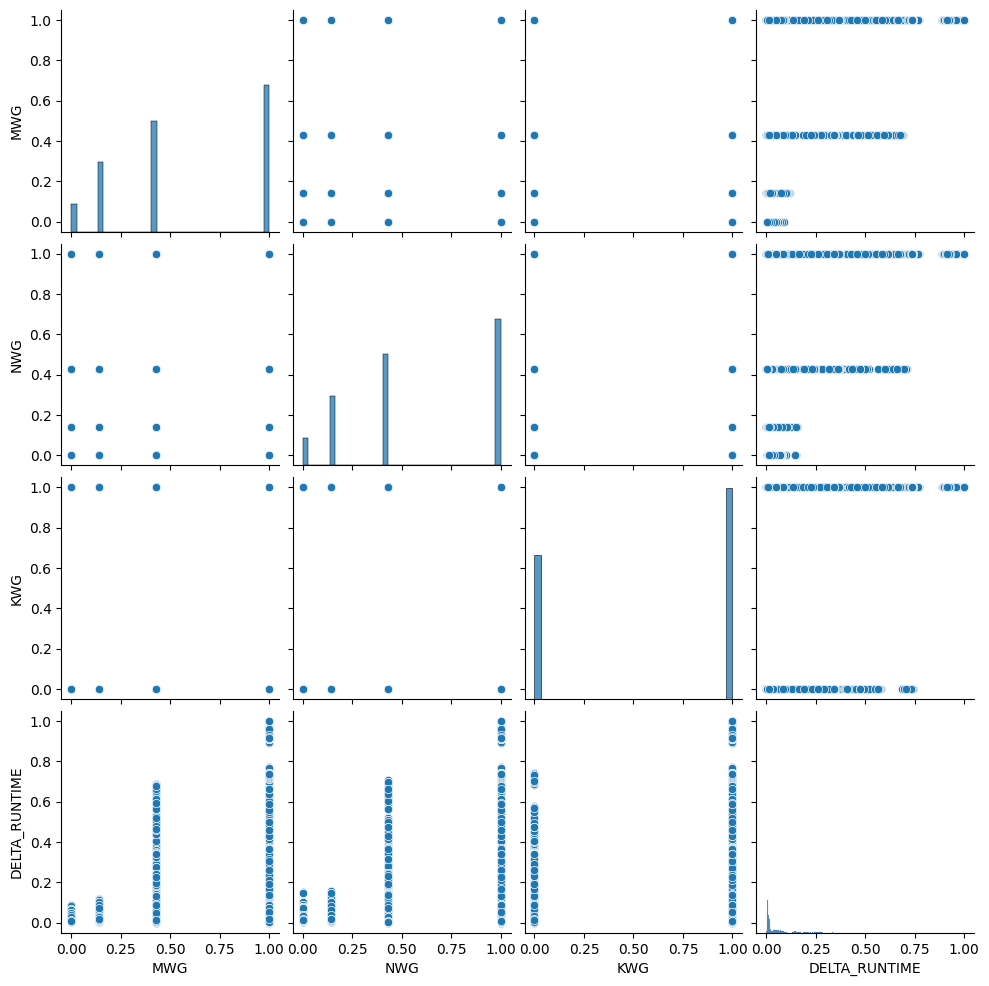

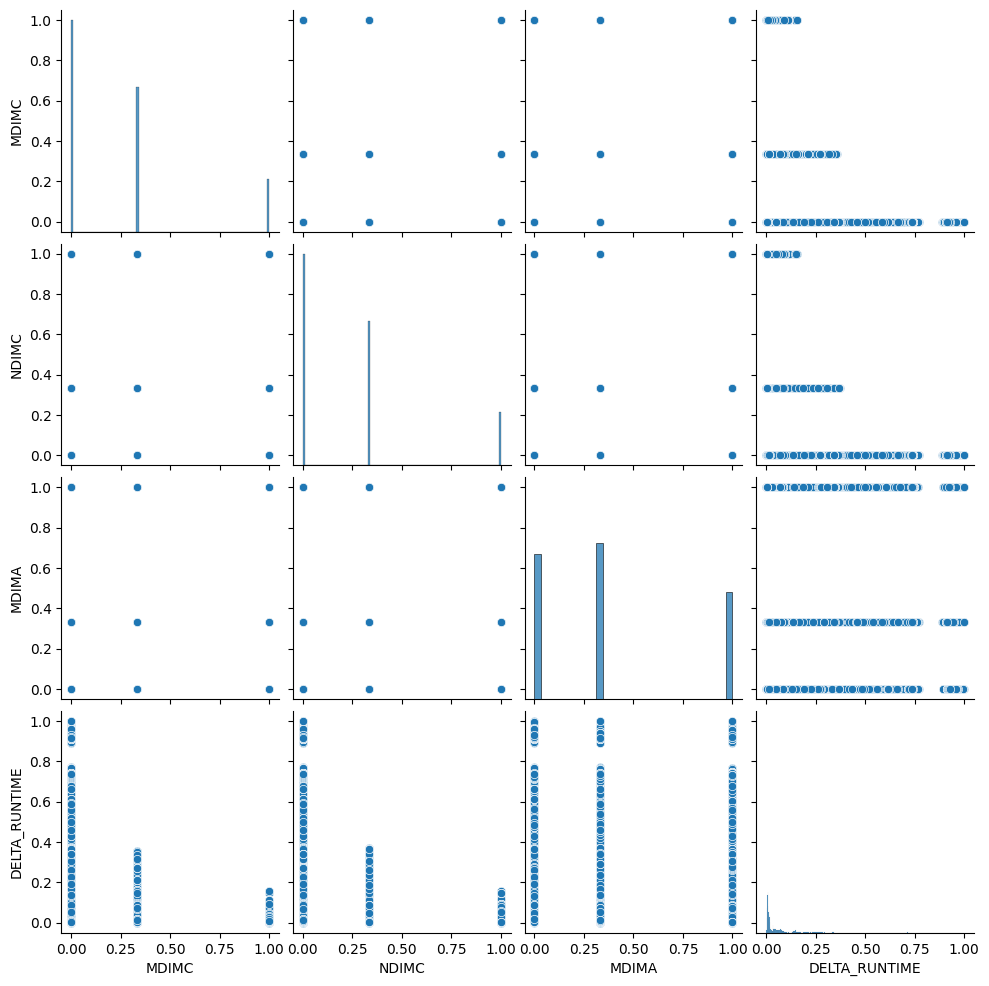

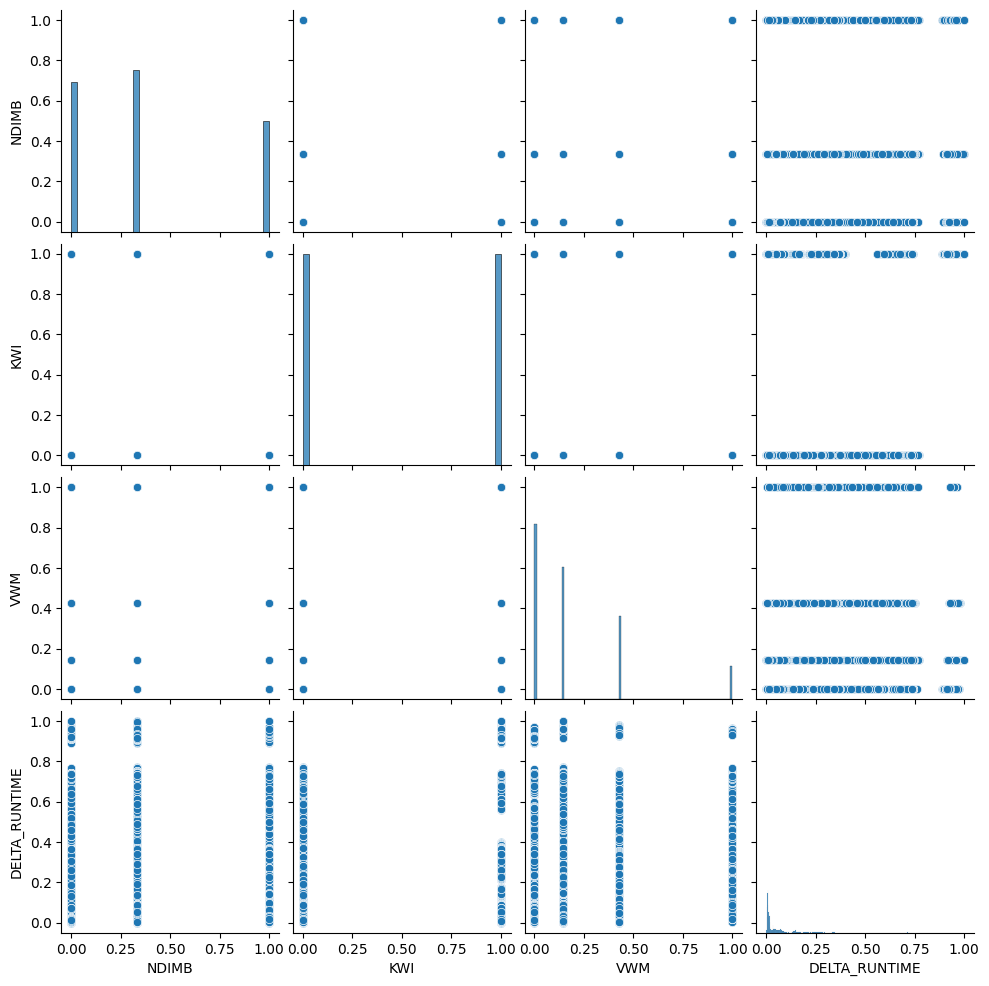

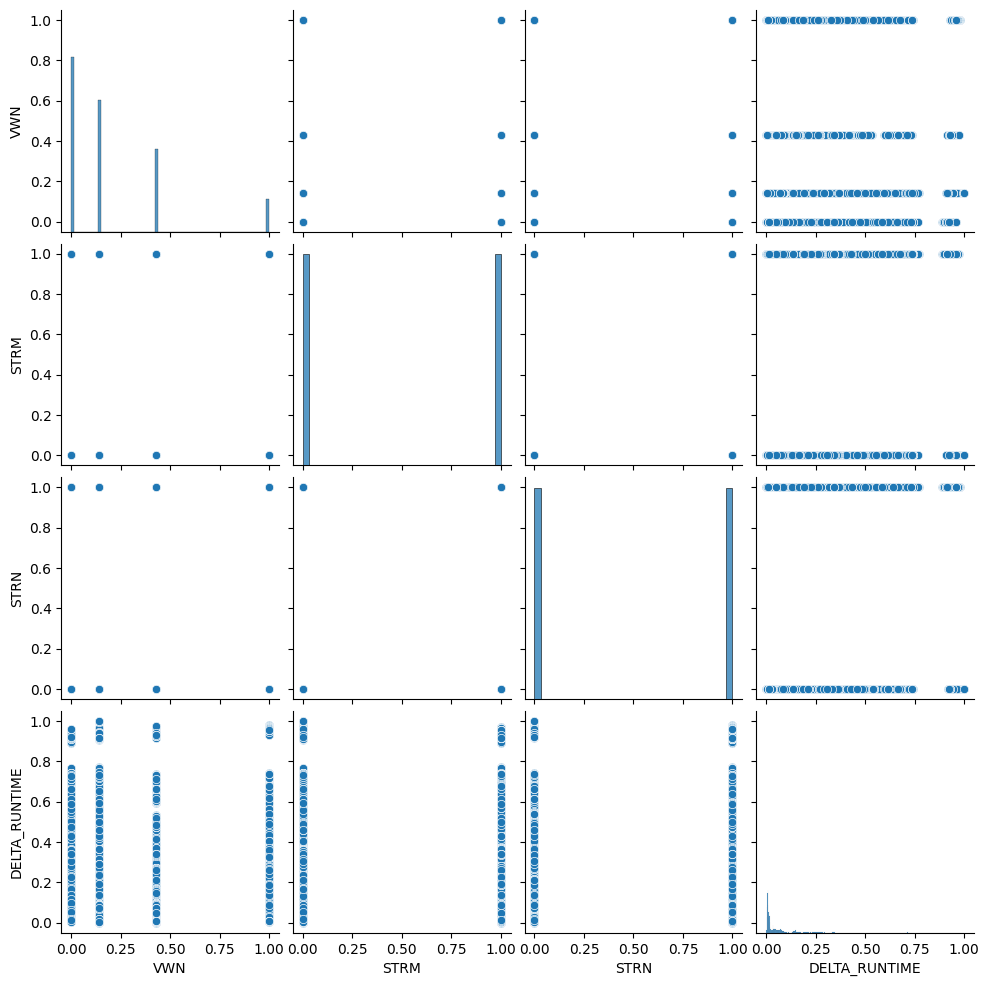

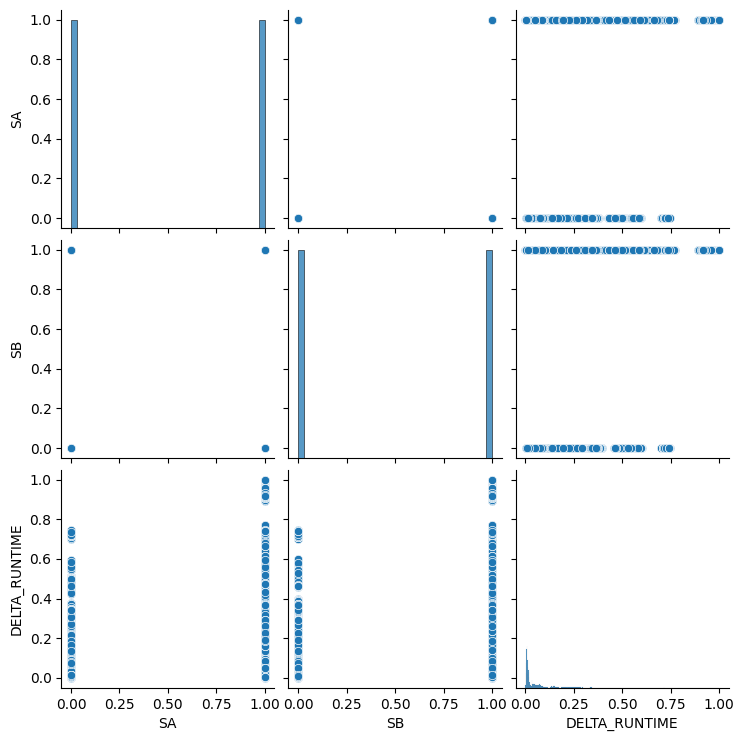

In [15]:
#Make correlation matrix of combined_df
combined_df.corr()
#Show scatterplot matrix of combined_df
import seaborn as sns
# Reset index to avoid duplicate labels
combined_df = combined_df.reset_index(drop=True)
sns.pairplot(combined_df)
#Show scatterplot matrix of first three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, :3].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 3:6].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 6:9].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next three predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 9:12].join(combined_df['DELTA_RUNTIME']))
#Show scatterplot matrix of next two predictors and delta_runtime
sns.pairplot(combined_df.iloc[:, 12:14].join(combined_df['DELTA_RUNTIME']))


Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')


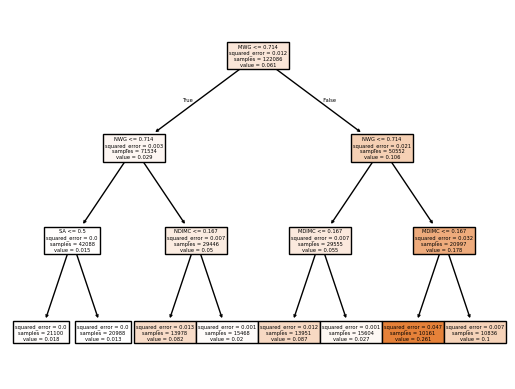

In [22]:
#Katelyn's code on visualizing a tree in a random forest
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Visualize the decision tree using Matplotlib's plot_tree method
feature_names = X.columns
print(feature_names)

#changing the maximum depth to better visualize the
rf = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
rf.fit(X, y)

#Get the first tree
individual_tree = rf.estimators_[0]


#and then plot
plot_tree(individual_tree, feature_names=feature_names, filled=True)
plt.show()